In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
from density_ratio import RelativeDensityRatioEstimator, grid_search_cv

In [3]:
iris = load_iris()

In [4]:
data = iris.data
label = iris.target

In [5]:
data_a = data[label == 0, :2]
data_b = data[label == 1, :2]

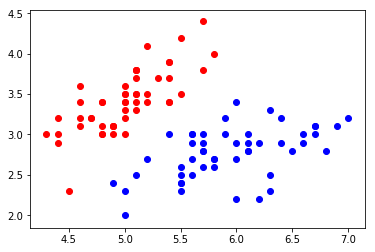

In [6]:
plt.scatter(data_a[:, 0], data_a[:, 1], c="r")
plt.scatter(data_b[:, 0], data_b[:, 1], c="b")
plt.show()

## モデルの学習

In [7]:
model = RelativeDensityRatioEstimator(nf=2, nbasis=1000)

In [26]:
model.fit(data_a, data_b)

## 密度比を予測

In [9]:
xgrid, ygrid = np.meshgrid(np.linspace(4, 7.5, 100), np.linspace(1.5, 4.5, 100))

In [10]:
predicted_ratio = model.predict(x=np.c_[xgrid.ravel(), ygrid.ravel()]).reshape(100, 100)

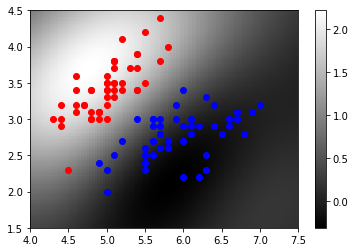

In [11]:
plt.pcolor(xgrid, ygrid, predicted_ratio, cmap="gray")
plt.colorbar()
plt.scatter(data_a[:, 0], data_a[:, 1], c="r")
plt.scatter(data_b[:, 0], data_b[:, 1], c="b")
plt.show()

## ハイパーパラメータチューニング

In [14]:
requires = {"nf": 2, "nbasis": 1000}      # 固定パラメータ
params = {"beta": [0.1, .5], "lam": [0.1, .3, 1., 10], "ls": [.1, 1., 10]}    # チューニングパラメータ

In [40]:
%%time
result = grid_search_cv(requires, params, data_a, data_b)

32 combinations with 3Fold Cross Validation
CPU times: user 15.3 s, sys: 3.55 s, total: 18.9 s
Wall time: 9.57 s


In [41]:
# 上位5パターン
result[:5]

beta  lam   ls    _score
1   0.1  0.1  0.5 -2.500322
2   0.1  0.1  1.0 -2.383462
6   0.1  0.3  1.0 -1.335818
5   0.1  0.3  0.5 -1.255533
3   0.1  0.1  3.0 -1.235756

In [42]:
best_params = dict(result.iloc[0, :-1])

In [43]:
model = RelativeDensityRatioEstimator(**{**requires, **best_params})
model.fit(data_a, data_b)

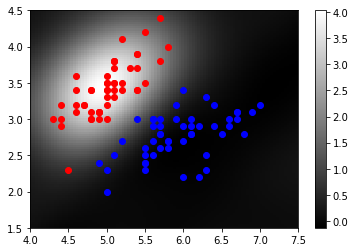

In [44]:
predicted_ratio = model.predict(x=np.c_[xgrid.ravel(), ygrid.ravel()]).reshape(100, 100)
plt.pcolor(xgrid, ygrid, predicted_ratio, cmap="gray")
plt.colorbar()
plt.scatter(data_a[:, 0], data_a[:, 1], c="r")
plt.scatter(data_b[:, 0], data_b[:, 1], c="b")
plt.show()